<a href="https://colab.research.google.com/github/Radhika-0403/Machine-Learning/blob/main/lstm_Time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# univariate lstm example
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
df=pd.read_csv("/content/daily-minimum-temperatures.csv")
df

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8
...,...,...
3645,27-12-1990,14.0
3646,28-12-1990,13.6
3647,29-12-1990,13.5
3648,30-12-1990,15.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [8]:
df["Date"]=pd.to_datetime(df["Date"])

<ipython-input-8-eb7c99974807>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"]=pd.to_datetime(df["Date"])


In [11]:
df.shape

(3650, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Epoch 1/50
2917/2917 [==============================] - 6s 2ms/step - loss: 0.0137 - val_loss: 0.0095
Epoch 2/50
2917/2917 [==============================] - 5s 2ms/step - loss: 0.0099 - val_loss: 0.0106
Epoch 3/50
2917/2917 [==============================] - 5s 2ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 4/50
2917/2917 [==============================] - 6s 2ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 5/50
2917/2917 [==============================] - 5s 2ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 6/50
2917/2917 [==============================] - 6s 2ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 7/50
2917/2917 [==============================] - 5s 2ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 8/50
2917/2917 [==============================] - 6s 2ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 9/50
2917/2917 [==============================] - 5s 2ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 10/50
2917/2917 [==============================] - 6s 2ms/step - loss: 0.009

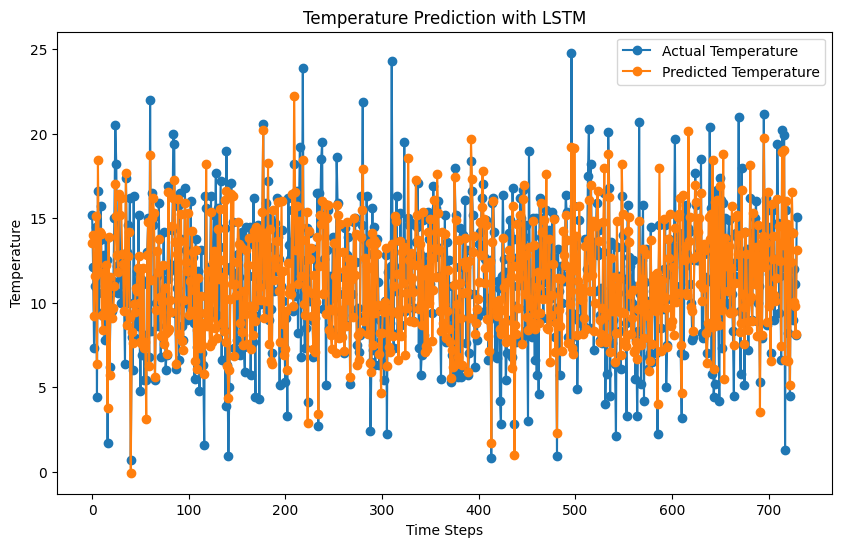

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Temp'] = scaler.fit_transform(df['Temp'].values.reshape(-1, 1))

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

# Hyperparameters
seq_length = 3
epochs = 50
batch_size = 1

# Create sequences and target values
X, y = create_sequences(df['Temp'].values, seq_length)

# Reshape for LSTM input shape (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Temperature', marker='o')
plt.plot(y_pred_inv, label='Predicted Temperature', marker='o')
plt.title('Temperature Prediction with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
print(y_pred)

Prediction_for_10_Days

In [20]:
n_steps = 3
n_features = 1
x_input = np.array([187, 196, 210])


# List to store the predicted values for the next 10 days
lst_output = []

# Generate predictions for the next 10 days
for i in range(10):
    if len(x_input) > n_steps:
        x_input_seq = x_input[-n_steps:].reshape((1, n_steps, n_features))
        yhat = model.predict(x_input_seq, verbose=0)
        x_input = np.append(x_input, yhat[0][0])
        lst_output.append(yhat[0][0])
    else:
        x_input_seq = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input_seq, verbose=0)
        x_input = np.append(x_input, yhat[0][0])
        lst_output.append(yhat[0][0])

print("Predicted values for the next 10 days:", lst_output)

Predicted values for the next 10 days: [241.67668, 279.2045, 323.51404, 375.64844, 436.80176, 508.36584, 591.9866, 689.614, 803.5457, 936.47107]
